In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as s
from scipy import stats as ss

In [2]:
df = pd.read_csv('contacts.tsv', sep = "\t")

In [3]:
df.head()

,id_guest,id_host,id_listing,ts_contact_at,ts_reply_at,ts_accepted_at,ts_booking_at,ds_checkin,ds_checkout,n_guests,n_messages
0,000dfad9-459b-4f0b-8310-3d6ab34e4f57,13bb24b8-d432-43a2-9755-5ea11b43bb69,21d2b1a2-fdc3-4b4c-a1f0-0eaf0cc02370,2014-10-04 16:26:28.0,2014-10-04 16:26:28.0,2014-10-04 16:26:28.0,2014-10-04 16:26:28.0,2014-10-13,2014-10-15,2,13
1,00197051-c6cb-4c3a-99e9-86615b819874,46aa3897-9c00-4d76-ac66-a307593d0675,fb5ed09a-9848-4f2c-b2ef-34deb62164fb,2014-11-04 09:10:03.0,2014-11-04 09:45:50.0,2014-11-04 09:45:50.0,2014-11-04 12:20:46.0,2014-11-27,2014-11-30,1,10
2,0027538e-aa9e-4a02-8979-b8397e5d4cba,6bbb88ca-db66-48c5-9c4b-862f7706284a,d3871da6-8012-4dc4-b508-c91f2c10c297,2014-10-10 12:02:50.0,2014-10-10 15:07:01.0,NaN,NaN,2014-10-17,2014-10-19,2,3
3,0027538e-aa9e-4a02-8979-b8397e5d4cba,8772bc85-a9b7-4d85-a52d-41f3620c2912,0d9b5583-8053-4b67-adfe-8c29eb12efed,2014-10-10 15:23:53.0,NaN,NaN,NaN,2014-10-17,2014-10-19,2,2
4,0027538e-aa9e-4a02-8979-b8397e5d4cba,ac162061-55e2-4072-ac91-2e080f9581f2,ec68e0af-b0f2-42c7-b6f8-d41061c083ff,2014-10-10 15:22:26.0,2014-10-10 15:24:26.0,2014-10-10 15:24:26.0,2014-10-10 15:52:42.0,2014-10-17,2014-10-19,2,14


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7823 entries, 0 to 7822
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id_guest        7823 non-null   object
 1   id_host         7823 non-null   object
 2   id_listing      7823 non-null   object
 3   ts_contact_at   7823 non-null   object
 4   ts_reply_at     7219 non-null   object
 5   ts_accepted_at  3627 non-null   object
 6   ts_booking_at   2174 non-null   object
 7   ds_checkin      7823 non-null   object
 8   ds_checkout     7823 non-null   object
 9   n_guests        7823 non-null   int64 
 10  n_messages      7823 non-null   int64 
dtypes: int64(2), object(9)
memory usage: 672.4+ KB


In [5]:
df['ts_accepted_at'].fillna('NaT', inplace = True)

In [6]:
status = []
for i in df.ts_accepted_at:
    if i == "NaT":
        status.append('Rejected')
    else:
        status.append('Accepted')

In [7]:
df['status'] = status

In [8]:
to_upper = ['id_guest','id_host','id_listing']

In [9]:
for i in to_upper:
    df[i] = df[i].str.upper()

In [10]:
to_datetime = ['ts_contact_at','ts_reply_at','ts_accepted_at','ts_booking_at','ds_checkin','ds_checkout']

In [11]:
for i in to_datetime:
    df[i] = pd.to_datetime(df[i])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7823 entries, 0 to 7822
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id_guest        7823 non-null   object        
 1   id_host         7823 non-null   object        
 2   id_listing      7823 non-null   object        
 3   ts_contact_at   7823 non-null   datetime64[ns]
 4   ts_reply_at     7219 non-null   datetime64[ns]
 5   ts_accepted_at  3627 non-null   datetime64[ns]
 6   ts_booking_at   2174 non-null   datetime64[ns]
 7   ds_checkin      7823 non-null   datetime64[ns]
 8   ds_checkout     7823 non-null   datetime64[ns]
 9   n_guests        7823 non-null   int64         
 10  n_messages      7823 non-null   int64         
 11  status          7823 non-null   object        
dtypes: datetime64[ns](6), int64(2), object(4)
memory usage: 733.5+ KB


In [13]:
df.head()

,id_guest,id_host,id_listing,ts_contact_at,ts_reply_at,ts_accepted_at,ts_booking_at,ds_checkin,ds_checkout,n_guests,n_messages,status
0,000DFAD9-459B-4F0B-8310-3D6AB34E4F57,13BB24B8-D432-43A2-9755-5EA11B43BB69,21D2B1A2-FDC3-4B4C-A1F0-0EAF0CC02370,2014-10-04 16:26:28,2014-10-04 16:26:28,2014-10-04 16:26:28,2014-10-04 16:26:28,2014-10-13,2014-10-15,2,13,Accepted
1,00197051-C6CB-4C3A-99E9-86615B819874,46AA3897-9C00-4D76-AC66-A307593D0675,FB5ED09A-9848-4F2C-B2EF-34DEB62164FB,2014-11-04 09:10:03,2014-11-04 09:45:50,2014-11-04 09:45:50,2014-11-04 12:20:46,2014-11-27,2014-11-30,1,10,Accepted
2,0027538E-AA9E-4A02-8979-B8397E5D4CBA,6BBB88CA-DB66-48C5-9C4B-862F7706284A,D3871DA6-8012-4DC4-B508-C91F2C10C297,2014-10-10 12:02:50,2014-10-10 15:07:01,NaT,NaT,2014-10-17,2014-10-19,2,3,Rejected
3,0027538E-AA9E-4A02-8979-B8397E5D4CBA,8772BC85-A9B7-4D85-A52D-41F3620C2912,0D9B5583-8053-4B67-ADFE-8C29EB12EFED,2014-10-10 15:23:53,NaT,NaT,NaT,2014-10-17,2014-10-19,2,2,Rejected
4,0027538E-AA9E-4A02-8979-B8397E5D4CBA,AC162061-55E2-4072-AC91-2E080F9581F2,EC68E0AF-B0F2-42C7-B6F8-D41061C083FF,2014-10-10 15:22:26,2014-10-10 15:24:26,2014-10-10 15:24:26,2014-10-10 15:52:42,2014-10-17,2014-10-19,2,14,Accepted


In [14]:
to_datetime = ['ts_contact_at','ts_reply_at','ts_accepted_at','ts_booking_at','ds_checkin','ds_checkout']

In [15]:
for i in to_datetime:
    df[i] = pd.to_datetime(df[i])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7823 entries, 0 to 7822
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id_guest        7823 non-null   object        
 1   id_host         7823 non-null   object        
 2   id_listing      7823 non-null   object        
 3   ts_contact_at   7823 non-null   datetime64[ns]
 4   ts_reply_at     7219 non-null   datetime64[ns]
 5   ts_accepted_at  3627 non-null   datetime64[ns]
 6   ts_booking_at   2174 non-null   datetime64[ns]
 7   ds_checkin      7823 non-null   datetime64[ns]
 8   ds_checkout     7823 non-null   datetime64[ns]
 9   n_guests        7823 non-null   int64         
 10  n_messages      7823 non-null   int64         
 11  status          7823 non-null   object        
dtypes: datetime64[ns](6), int64(2), object(4)
memory usage: 733.5+ KB


In [17]:
df_status_msg = df.pivot_table(index = 'id_host' , columns = 'status' , values = 'n_messages' , aggfunc = 'sum').reset_index()

In [18]:
accepted_msg = df_status_msg[['id_host','Accepted']].sort_values(by = 'Accepted',ascending = False).head()

In [19]:
rejected_msg = df_status_msg[['id_host','Rejected']].sort_values(by = 'Rejected',ascending = False).head()

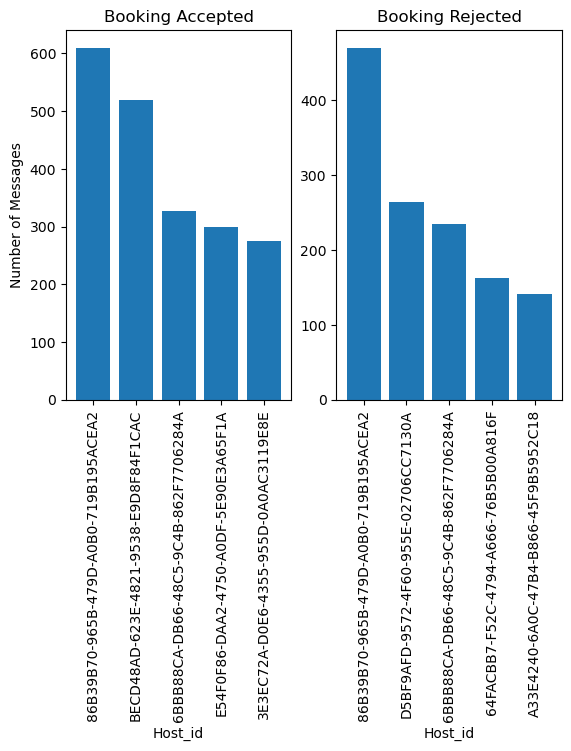

In [20]:
x = accepted_msg['id_host']
y = accepted_msg['Accepted']
plt.subplot(1,2,1)
plt.bar(x,y)
plt.xticks(rotation = 90)
plt.xlabel('Host_id')
plt.ylabel('Number of Messages')
plt.title('Booking Accepted')
x = rejected_msg['id_host']
y = rejected_msg['Rejected']
plt.subplot(1,2,2)
plt.bar(x,y)
plt.xticks(rotation = 90)
plt.xlabel('Host_id')
plt.title('Booking Rejected')
plt.show()

Top 5 Most Messeged Dublin Hosts & Their Booking Acceptance Rate.

In [21]:
df['Time_taken_rply'] = df['ts_reply_at'] - df['ts_contact_at']

In [22]:
Time_taken_rply = []
for i in range(len(df)):
    try:
        Time_taken_rply.append(abs(df['Time_taken_rply'][i]).total_seconds() / 3600)
    except Exception:
        Time_taken_rply.append(np.nan)

In [23]:
df['Time_taken_rply'] = Time_taken_rply

In [24]:
df.head()

,id_guest,id_host,id_listing,ts_contact_at,ts_reply_at,ts_accepted_at,ts_booking_at,ds_checkin,ds_checkout,n_guests,n_messages,status,Time_taken_rply
0,000DFAD9-459B-4F0B-8310-3D6AB34E4F57,13BB24B8-D432-43A2-9755-5EA11B43BB69,21D2B1A2-FDC3-4B4C-A1F0-0EAF0CC02370,2014-10-04 16:26:28,2014-10-04 16:26:28,2014-10-04 16:26:28,2014-10-04 16:26:28,2014-10-13,2014-10-15,2,13,Accepted,0.000000
1,00197051-C6CB-4C3A-99E9-86615B819874,46AA3897-9C00-4D76-AC66-A307593D0675,FB5ED09A-9848-4F2C-B2EF-34DEB62164FB,2014-11-04 09:10:03,2014-11-04 09:45:50,2014-11-04 09:45:50,2014-11-04 12:20:46,2014-11-27,2014-11-30,1,10,Accepted,0.596389
2,0027538E-AA9E-4A02-8979-B8397E5D4CBA,6BBB88CA-DB66-48C5-9C4B-862F7706284A,D3871DA6-8012-4DC4-B508-C91F2C10C297,2014-10-10 12:02:50,2014-10-10 15:07:01,NaT,NaT,2014-10-17,2014-10-19,2,3,Rejected,3.069722
3,0027538E-AA9E-4A02-8979-B8397E5D4CBA,8772BC85-A9B7-4D85-A52D-41F3620C2912,0D9B5583-8053-4B67-ADFE-8C29EB12EFED,2014-10-10 15:23:53,NaT,NaT,NaT,2014-10-17,2014-10-19,2,2,Rejected,NaN
4,0027538E-AA9E-4A02-8979-B8397E5D4CBA,AC162061-55E2-4072-AC91-2E080F9581F2,EC68E0AF-B0F2-42C7-B6F8-D41061C083FF,2014-10-10 15:22:26,2014-10-10 15:24:26,2014-10-10 15:24:26,2014-10-10 15:52:42,2014-10-17,2014-10-19,2,14,Accepted,0.033333


In [25]:
avg_to_rply = df.groupby('status')[['Time_taken_rply']].mean(numeric_only = True).reset_index()

In [26]:
avg_to_rply

,status,Time_taken_rply
0,Accepted,5.265618
1,Rejected,14.086058


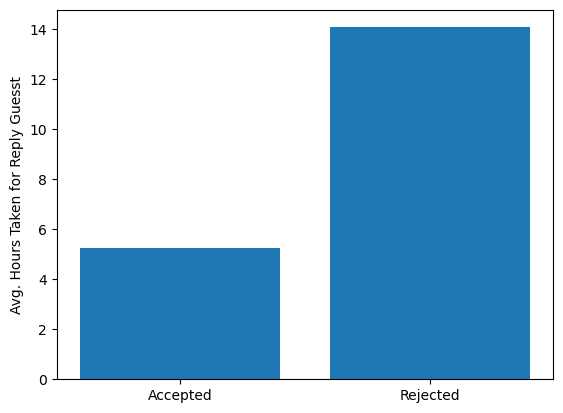

In [27]:
x = avg_to_rply['status']
y = avg_to_rply['Time_taken_rply']
plt.bar(x,y)
plt.ylabel('Avg. Hours Taken for Reply Guesst')
plt.show()

Hosts take on average 5 hrs. to accpect the booking and take on average 14 hrs. to reject the booking.

In [28]:
no_of_days = []
for i in range(len(df)):
    no_of_days.append(abs(df['ds_checkout'][i] - df['ds_checkin'][i]).total_seconds() / (3600*24))

In [29]:
df['No_of_days'] = no_of_days

In [30]:
df.head()

,id_guest,id_host,id_listing,ts_contact_at,ts_reply_at,ts_accepted_at,ts_booking_at,ds_checkin,ds_checkout,n_guests,n_messages,status,Time_taken_rply,No_of_days
0,000DFAD9-459B-4F0B-8310-3D6AB34E4F57,13BB24B8-D432-43A2-9755-5EA11B43BB69,21D2B1A2-FDC3-4B4C-A1F0-0EAF0CC02370,2014-10-04 16:26:28,2014-10-04 16:26:28,2014-10-04 16:26:28,2014-10-04 16:26:28,2014-10-13,2014-10-15,2,13,Accepted,0.000000,2.0
1,00197051-C6CB-4C3A-99E9-86615B819874,46AA3897-9C00-4D76-AC66-A307593D0675,FB5ED09A-9848-4F2C-B2EF-34DEB62164FB,2014-11-04 09:10:03,2014-11-04 09:45:50,2014-11-04 09:45:50,2014-11-04 12:20:46,2014-11-27,2014-11-30,1,10,Accepted,0.596389,3.0
2,0027538E-AA9E-4A02-8979-B8397E5D4CBA,6BBB88CA-DB66-48C5-9C4B-862F7706284A,D3871DA6-8012-4DC4-B508-C91F2C10C297,2014-10-10 12:02:50,2014-10-10 15:07:01,NaT,NaT,2014-10-17,2014-10-19,2,3,Rejected,3.069722,2.0
3,0027538E-AA9E-4A02-8979-B8397E5D4CBA,8772BC85-A9B7-4D85-A52D-41F3620C2912,0D9B5583-8053-4B67-ADFE-8C29EB12EFED,2014-10-10 15:23:53,NaT,NaT,NaT,2014-10-17,2014-10-19,2,2,Rejected,NaN,2.0
4,0027538E-AA9E-4A02-8979-B8397E5D4CBA,AC162061-55E2-4072-AC91-2E080F9581F2,EC68E0AF-B0F2-42C7-B6F8-D41061C083FF,2014-10-10 15:22:26,2014-10-10 15:24:26,2014-10-10 15:24:26,2014-10-10 15:52:42,2014-10-17,2014-10-19,2,14,Accepted,0.033333,2.0


In [31]:
avg_days = df.groupby('status')[['No_of_days']].mean().reset_index()

In [32]:
avg_days

,status,No_of_days
0,Accepted,5.031982
1,Rejected,6.481411


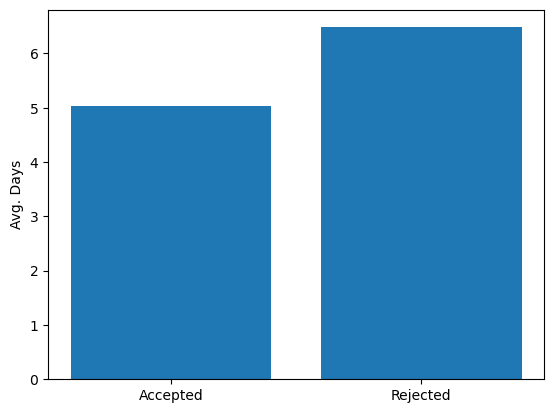

In [33]:
x = avg_days['status']
y = avg_days['No_of_days']
plt.bar(x,y)
plt.ylabel('Avg. Days')
plt.show()

Host is intrest to accpect the guest who stays less than 5 days.

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7823 entries, 0 to 7822
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id_guest         7823 non-null   object        
 1   id_host          7823 non-null   object        
 2   id_listing       7823 non-null   object        
 3   ts_contact_at    7823 non-null   datetime64[ns]
 4   ts_reply_at      7219 non-null   datetime64[ns]
 5   ts_accepted_at   3627 non-null   datetime64[ns]
 6   ts_booking_at    2174 non-null   datetime64[ns]
 7   ds_checkin       7823 non-null   datetime64[ns]
 8   ds_checkout      7823 non-null   datetime64[ns]
 9   n_guests         7823 non-null   int64         
 10  n_messages       7823 non-null   int64         
 11  status           7823 non-null   object        
 12  Time_taken_rply  7219 non-null   float64       
 13  No_of_days       7823 non-null   float64       
dtypes: datetime64[ns](6), float64(2), int64(

In [35]:
df.skew(axis = 0 , numeric_only= True , skipna = True)

n_guests            2.441468
n_messages          3.696440
Time_taken_rply    17.282051
No_of_days         13.765022
dtype: float64

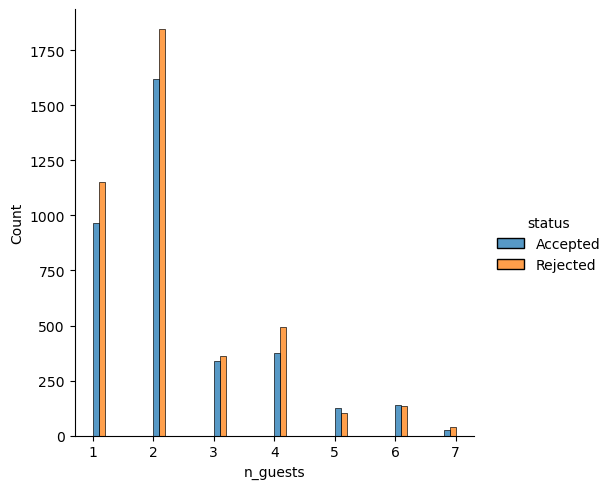

In [36]:
# No of Guests stayed
contacts_less8 = df[df['n_guests'] < 8]
sns.displot(contacts_less8 , x = 'n_guests' , hue = 'status' , multiple = 'dodge')
plt.show()

Choosing less than 8 guests, since only 1.46% (1 14 values) of the contacts dataset has 8 or more guests. To better visualize the majority distribution we removed rows with 8 or more guests.

2 guests is the most popular option to book, but 1 guest is the most popularly searched option. This leads me to believe there is a lack of supply of viable single guest rooms.

In [37]:
#Conversion rate from accepting to booking
df['ts_booking_at'].count() / df['ts_accepted_at'].count()

0.5993934381031155

In [38]:
df['month_checkin'] = df['ds_checkin'].dt.month
contacts_checkin_month = df[df['month_checkin'] > 9] # use only peak season month (oct , nov , dec)

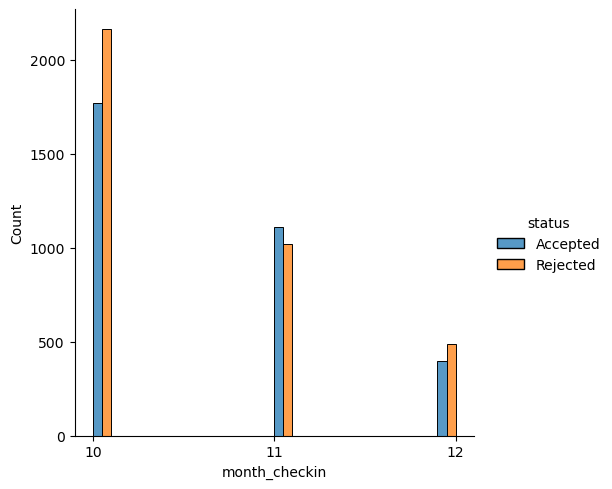

In [39]:
sns.displot(contacts_checkin_month, x = 'month_checkin' , hue = 'status' , multiple = 'dodge')
plt.xticks([10,11,12])
plt.show()